In [1]:
from qiskit import IBMQ
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.10.0',
 'qiskit-aer': '0.3.2',
 'qiskit-ignis': '0.2.0',
 'qiskit-ibmq-provider': '0.3.3',
 'qiskit-aqua': '0.6.1',
 'qiskit': '0.13.0'}

In [2]:
provider = IBMQ.load_account()
#change the provider based on your Qiskit account
provider = IBMQ.get_provider(hub='ibm-q-ncsu', group='nc-state', project='on-boarding')
#if you do not have access to the twenty qubit machine, use this publically available 14 qubit machine instead
#provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q-ncsu', group='nc-state', project='on-boarding')>,
 <IBMQBackend('ibmq_20_tokyo') from IBMQ(hub='ibm-q-ncsu', group='nc-state', project='on-boarding')>,
 <IBMQBackend('ibmq_poughkeepsie') from IBMQ(hub='ibm-q-ncsu', group='nc-state', project='on-boarding')>,
 <IBMQBackend('ibmq_boeblingen') from IBMQ(hub='ibm-q-ncsu', group='nc-state', project='on-boarding')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q-ncsu', group='nc-state', project='on-boarding')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q-ncsu', group='nc-state', project='on-boarding')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q-ncsu', group='nc-state', project='on-boarding')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q-ncsu', group='nc-state', project='on-boarding')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q-ncsu', group='nc-state', project='on-boarding')>,
 <IBMQBackend('ibmq_almaden') from IBMQ(hub='ibm-q-ncsu', group='nc-state

In [3]:
from qiskit import *
from qiskit.compiler import transpile
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor, backend_monitor, backend_overview
from qiskit.providers.aer import noise
import math

import numpy as np

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute

from qiskit.providers.aer import UnitarySimulator
import qiskit.ignis.verification.tomography.basis.circuits

In [7]:
# Needed for functions
import numpy as np
import time
from copy import deepcopy

# Import Qiskit classes
import qiskit 
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister, Aer
from qiskit.quantum_info import state_fidelity
from qiskit.providers.aer import noise

#Include our assertion function
from qiskit.compiler.assertion import classical_assertion, superposition_assertion, entanglement_assertion

In [5]:
#we used ibmq_20_tokyo for our experiment, however, that backend has retired. So we can use the 20qubit boeblingen instead
device = provider.get_backend('ibmq_boeblingen')
backend_monitor(device)
device

ibmq_boeblingen
Configuration
-------------
    n_qubits: 20
    operational: True
    status_msg: active
    pending_jobs: 272
    backend_version: 1.0.3
    basis_gates: ['u1', 'u2', 'u3', 'cx', 'id']
    local: False
    simulator: False
    credits_required: True
    coupling_map: [[0, 1], [1, 0], [1, 2], [1, 6], [2, 1], [2, 3], [3, 2], [3, 4], [3, 8], [4, 3], [5, 6], [5, 10], [6, 1], [6, 5], [6, 7], [7, 6], [7, 8], [7, 12], [8, 3], [8, 7], [8, 9], [9, 8], [9, 14], [10, 5], [10, 11], [11, 10], [11, 12], [11, 16], [12, 7], [12, 11], [12, 13], [13, 12], [13, 14], [13, 18], [14, 9], [14, 13], [15, 16], [16, 11], [16, 15], [16, 17], [17, 16], [17, 18], [18, 13], [18, 17], [18, 19], [19, 18]]
    n_uchannels: 46
    meas_map: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]]
    quantum_volume: 16
    discriminators: ['linear_discriminator', 'quadratic_discriminator']
    acquisition_latency: []
    meas_kernels: ['boxcar']
    dt: 3.5555555555555554
    dtm: 3.55

<IBMQBackend('ibmq_boeblingen') from IBMQ(hub='ibm-q-ncsu', group='nc-state', project='on-boarding')>

In [8]:
#entangle3bit:
qr = QuantumRegister(3)
circ = QuantumCircuit(qr)
#assertion circuit for three qubit entanglement
qubitList = [qr[0], qr[1], qr[2]]
success = entanglement_assertion(circ, qubitList, flag = 0)
if not success:
    print("entanglement_assertion error")
trans_qc = transpile(circ, device, optimization_level = 3)

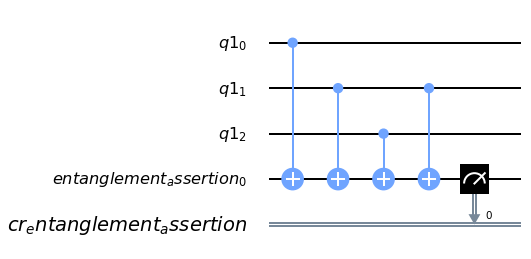

In [10]:
circ.draw(output = "mpl")

In [11]:
shots = 8192
#execute the job on real device
job = execute(trans_qc, backend=device, shots=shots)
job_monitor(job)
res = job.result()

Job Status: job has successfully run


In [12]:
res.job_id

'5de9bc84e2bddb00115c1f5b'

In [13]:
prob = res.get_counts(0)['1']/8192
print("Probability of false positive case = ", prob * 100, "%")

Probability of false positive case =  4.2724609375 %
